# Graphical analysis
## Graphical analysis of the IMDB data-set with 633.719 entries 

In [1]:
!pip install fastparquet
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import fastparquet
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
movies = pd.read_parquet("./input/parquet_files/movies.parquet", engine='fastparquet')
movies = movies.replace("", np.nan)

In [219]:
movies["maingenre"] = movies["genre"].str.split(",").str[0]

In [18]:
maingenre_counts = movies["maingenre"].value_counts()

In [23]:
def mypct(pct):
    if pct > 3:
        return f"{pct:.1f}%"
    else:
        return ""

<Axes: ylabel='count'>

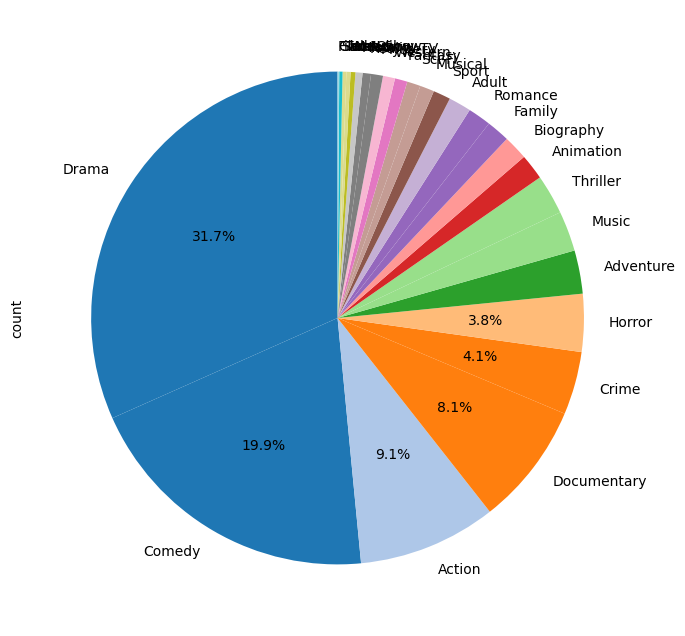

In [29]:
# Pie-Chart
plt.figure(figsize=(8, 8))  # Größe des Diagramms
maingenre_counts.plot.pie(autopct = mypct, startangle=90, cmap='tab20')

In [5]:
movies["maingenre"] = movies["genre"].str.split(",").str[0]

In [22]:
maingenre_count

maingenre
Drama          173308
Comedy         108751
Action          49719
Documentary     44071
Crime           22642
Horror          20736
Adventure       15554
Music           14413
Thriller        14293
Animation        9192
Biography        8796
Family           8336
Romance          8323
Adult            8104
Sport            6242
Musical          5132
Sci-Fi           4833
Fantasy          4488
Western          4341
Mystery          4269
Reality-TV       3036
History          2518
News             1736
War              1483
Talk-Show        1360
Short            1174
Game-Show         571
Film-Noir          30
Name: count, dtype: int64

In [50]:
def mypct(pct):
    if pct > 5: 
        
        return f"{pct:.1f}%"
    else:
        return ""

In [104]:
genre_count_filter = maingenre_count.copy()

In [105]:
threshold = genre_count_filter.values.sum() / 100 * 3

In [111]:
genre_count_filter = genre_count_filter[ genre_count_filter.values >= threshold]
genre_count_small = maingenre_count[ maingenre_count < threshold ]
genre_count_filter["Sonstige"] = genre_count_small.sum()

In [113]:
genre_count_filter

maingenre
Drama          173308
Comedy         108751
Action          49719
Documentary     44071
Crime           22642
Horror          20736
Sonstige       128224
Name: count, dtype: int64

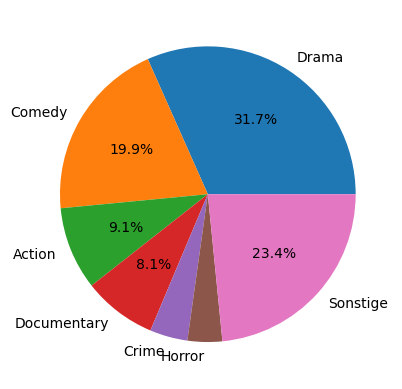

In [115]:
maingenre_count = movies["maingenre"].value_counts()
plot = plt.pie(genre_count_filter, labels = genre_count_filter.index, autopct=mypct)

In [131]:
main_genre_count = movies["maingenre"].value_counts()
main_genre_filt = main_genre_count.copy()
# Werte sollen erst ab einem Threshold von 5% eingehen
new_threshold = main_genre_count.sum() / 100 * 2
sonstig_genre = main_genre_count[ main_genre_count <= new_threshold ]

if not sonstig_genre.empty:
    main_genre_filt = main_genre_filt[ main_genre_filt > new_threshold ]
    main_genre_filt["Sonstige"] = sonstig_genre.sum()


In [132]:
main_genre_filt

maingenre
Drama          173308
Comedy         108751
Action          49719
Documentary     44071
Crime           22642
Horror          20736
Adventure       15554
Music           14413
Thriller        14293
Sonstige        83964
Name: count, dtype: int64

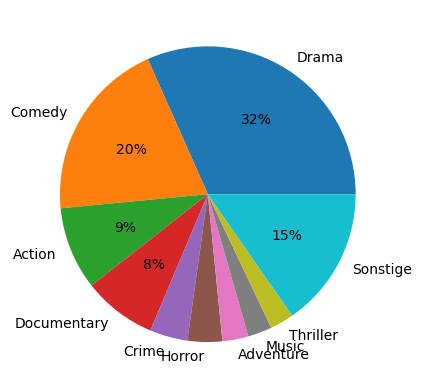

In [144]:
def percentage(prct):
    if prct > 5:
        # f"{WERT:FORMAT}"
        return f"{prct:.0f}%"
    else: 
        return ""

plot = plt.pie(main_genre_filt, labels = main_genre_filt.index, autopct=percentage)

In [159]:
genres = movies["genre"].dropna().str.split(",")
print(genres)

genre_list = dict()

for genres_elements in genres:
    for item in genres_elements:
        genre_list[item] = genre_list.get(item,0)+1

print(genre_list)

0                                [Comedy]
1                                [Comedy]
2                                 [Drama]
3                                 [Drama]
4          [Action,   Romance,   Western]
                       ...               
633714     [Biography,   Drama,   Family]
633715    [Biography,   Drama,   Musical]
633716                 [Drama,   Romance]
633717                [Comedy,   Musical]
633718              [Family,   Adventure]
Name: genre, Length: 547451, dtype: object
{'Comedy': 108751, 'Drama': 173308, 'Action': 49719, '  Romance': 38917, '  Western': 3225, '  War': 7066, 'Sci-Fi': 4833, '  Crime': 15066, '  Drama': 64505, '  Musical': 7114, 'Horror': 20736, '  Mystery': 12681, '  Sci-Fi': 8710, 'War': 1483, 'Adult': 8104, '  Comedy': 15787, 'Adventure': 15554, 'Crime': 22642, '  History': 8620, 'Romance': 8323, 'Thriller': 14293, '  Thriller': 27868, 'Biography': 8796, '  Music': 8962, 'Documentary': 44071, '  Fantasy': 10875, '  Adventure': 10935, 'Fa

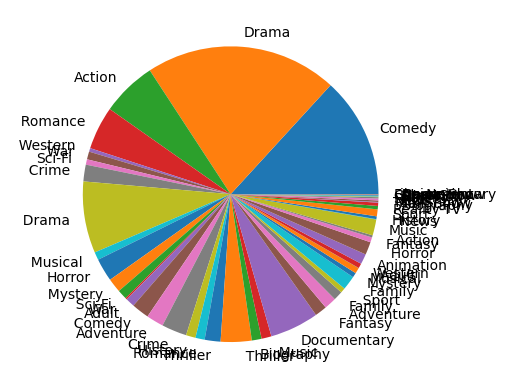

In [169]:
plot_sizes =[]
plot_lables = []

for key, value in genre_list.items():
    plot_lables.append(key) 
    plot_sizes.append(value)

plot = plt.pie(plot_sizes, labels=plot_lables)



In [204]:
movies.groupby("genre")["year"].unique().head()

genre
Action                        [1991, 1987, 1982, 2014, 2014 TV Movie, 1975, ...
Action,  Adult                [1981, 1988, 1989, 1993, 1984, 1976, 1975, 198...
Action,  Adult,  Adventure                                               [1968]
Action,  Adult,  Comedy                                 [1995, 1971, 1996, nan]
Action,  Adult,  Crime        [2018 TV Movie, 1981, 1991, 1977, 2011, 1973, ...
Name: year, dtype: object

In [7]:
movies["year_cln"] = movies["year"].replace(r"[^0-9]", "", regex = True) 
movies["year_cln"].sample(30)

253075    1995
445461    1935
632125    1978
406014     NaN
247201    1924
573459     NaN
169757    2014
253753    2006
454557    2019
58382     1980
426112    1927
366380    1998
23597      NaN
263146    2016
407542     NaN
244525    1947
90608     1920
463174     NaN
356608    1920
84202     2005
477830    1989
255135    1983
127151    2018
34507      NaN
106873    1970
180334    2002
394073    1959
512690    1966
113196     NaN
389919    1971
Name: year_cln, dtype: object

In [3]:
movies["year"].sample(30)

407467             2020
157237             2016
7398                NaN
614845    1970 TV Movie
229892             1973
326307             1974
145208    2010 TV Movie
221498             1956
123060    2007 TV Movie
607800    2001 TV Movie
236039             1998
504284    2011 TV Movie
606271         I) (2015
488702             1988
105797             2016
426082    1959 TV Movie
111299             2000
20934     1974 TV Movie
491779             2018
176556             1947
248930             1936
186370             2007
378593             1913
388664             1960
321672             1977
325245             1991
613357    2013 TV Movie
569474             1959
421907             2012
517445    2008 TV Movie
Name: year, dtype: object

In [34]:
histoplot_df = movies.groupby("ratingValue", dropna=True)["ratingValue"].count()
histoplot_df = histoplot_df.astype(float)
histoplot_df.info()

<class 'pandas.core.series.Series'>
Index: 91 entries, 1.0 to 9.9
Series name: ratingValue
Non-Null Count  Dtype  
--------------  -----  
91 non-null     float64
dtypes: float64(1)
memory usage: 1.4+ KB


<class 'matplotlib.axes._axes.Axes'>


Text(0.5, 1.0, 'Verteilung der Bewertungspunkte')

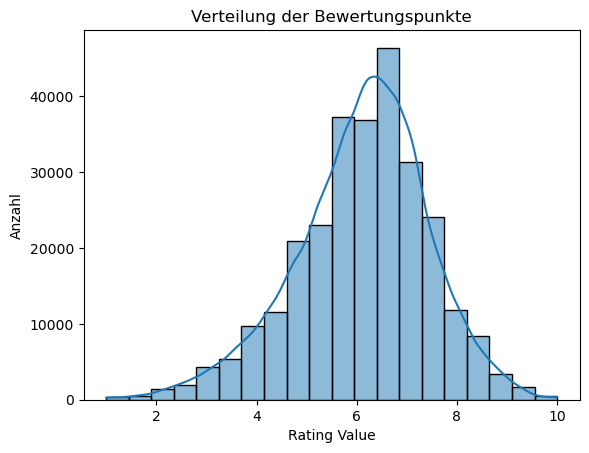

In [61]:
# Erstelle das Histogramm
grfk = sns.histplot(movies["ratingValue"].astype(float), bins=20, kde=True)

# Prüfe, ob grfk wirklich ein Axes-Objekt ist
print(type(grfk))  # Sollte <class 'matplotlib.axes._axes.Axes'> ausgeben

grfk.set_xlabel("Rating Value")  
grfk.set_ylabel("Anzahl")        
grfk.set_title("Verteilung der Bewertungspunkte")  


In [60]:
movies["ratingValue"].astype(float).median()

6.2

<Axes: xlabel='ratingValue', ylabel='year'>

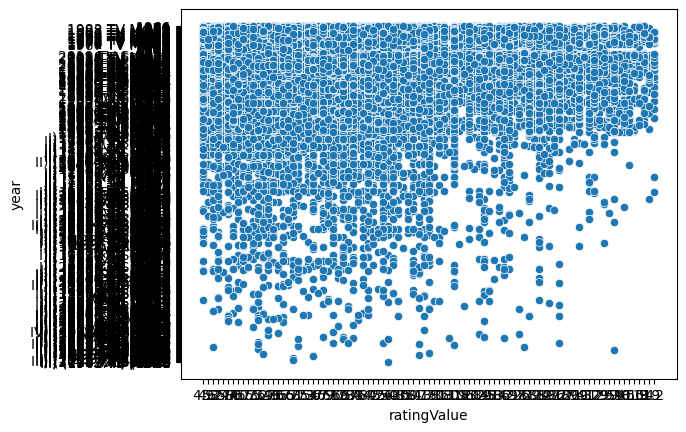

In [81]:
#ax = sns.scatterplot(data=sample_data, x="x", y="y", hue="cate")
sns.scatterplot(data=movies , x="ratingValue", y="year", hue = movies_ratingval_grp["year"])

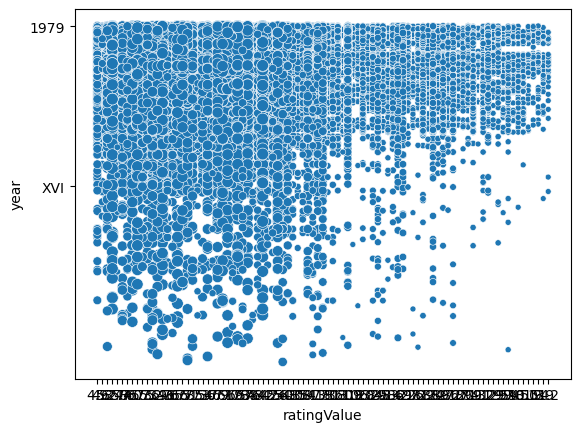

In [107]:
#ax = sns.scatterplot(data=sample_data, x="x", y="y", hue="cate")
ax = sns.scatterplot(data=movies, x="ratingValue", y="year", size=movies["ratingValue"].map(movies_ratingval_grp), legend=None)
ax.yaxis.set_ticks([1,500])

In [90]:
movies_ratingval_grp = movies.groupby("ratingValue").size()
movies_ratingval_grp

ratingValue
1.0    109
1.1     57
1.2     75
1.3     72
1.4     84
      ... 
9.5    124
9.6    129
9.7     85
9.8     88
9.9     37
Length: 91, dtype: int64

In [162]:
movies_yr_grp = movies.groupby("year_clnd").size()
movies_year_cnt = movies["year_clnd"].map(movies_yr_grp)
movies_year_cnt

0         3034.0
1         3713.0
2         3666.0
3         2502.0
4         2502.0
           ...  
633714       NaN
633715    3739.0
633716       NaN
633717       NaN
633718    2398.0
Name: year_clnd, Length: 633719, dtype: float64

In [167]:
mov_sample= movies.sample(200)

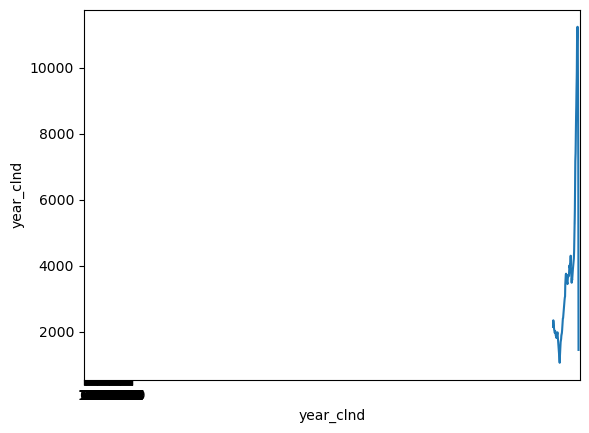

In [168]:
graph = sns.lineplot(x = "year_clnd", y = movies_year_cnt,  data = mov_sample, sort = True)
graph.set_xticks(range(len(mov_sample["year_clnd"].tolist()))) # <--- set the ticks first
#graph.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])


In [141]:
mov_sample

,ImdbId,name,year,runtime,genre,ratingValue,summary_text,ratingCount,director,cast
391459,tt8051834,The Bride,I,NaN,Horror,NaN,Remake of 2017 Russian movie centering on a tu...,NaN,NaN,NaN
248004,tt3180138,Performance Indeterminate Cage Opera,2013,88 min,"Comedy, History, Music",NaN,If you took the musical revolution of John Cag...,NaN,John Sanborn,"Joseph Copley, Margret Cromwell, Breton Tyner-..."
73779,tt3305614,DeadKiss,2013 TV Movie,NaN,Fantasy,NaN,Add a Plot,NaN,Julie Williams,"Angie Larocque, Réal Bossé, Maxime Savaria"
616536,tt10896634,Long Story Short,2021,90 min,"Comedy, Romance",6.8,Teddy wakes up the morning after his wedding t...,157,Josh Lawson,"Josh Lawson, Rafe Spall, Ronny Chieng, Noni Ha..."
84284,tt0120479,Warriors of Virtue,1997,101 min,"Action, Adventure, Fantasy",4.8,A young boy is whisked away to the mythical la...,"2,940",Ronny Yu,"Angus Macfadyen, Mario Yedidia, Marley Shelton..."
133596,tt0047435,The River and Death,1954,91 min,Drama,6.8,In a backward village where members of two riv...,746,Luis Buñuel,"Columba Domínguez, Miguel Torruco, Joaquín Cor..."
421709,tt0275608,Pyaar Mein Kabhi Kabhi...,1999,NaN,"Comedy, Drama, Musical",4.4,Siddhant recounts three months in his struggle...,167,Raj Kaushal,"Dino Morea, Rinke Khanna, Priya Ahluwalia, Tar..."
244220,tt0133421,Black & White Affair,1984,74 min,Adult,6.6,Add a Plot,16,Jack Genero,"Jack Baker, Lisa De Leeuw, Desiree Lane, Sahara"
129753,tt0363409,Aan: Men at Work,2004,149 min,"Action, Crime, Drama",5.7,DCP Patnaik and his team's fights against corr...,"2,880",Madhur Bhandarkar,"Akshay Kumar, Shatrughan Sinha, Sunil Shetty, ..."
185652,tt9795856,Fakebook Dhamaal,2019,128 min,Comedy,NaN,It is an upcoming Gujarati movie which focuses...,NaN,Manoj Patel,"Shruti Barot, Nishith Brahmbhatt, Nandini Meht..."


In [161]:
#movies["year_cln"] = movies["year"].replace(r"[^0-9]", np.nan, regex = True)

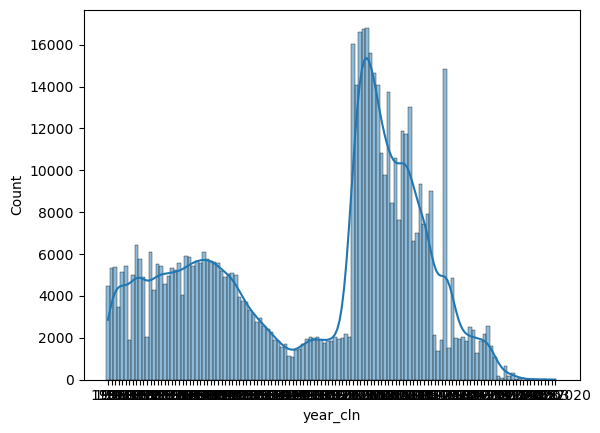

In [8]:
hplot_ratings = sns.histplot(movies["year_cln"], bins=20, kde=True)